In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv",header = 0)

In [ ]:
df

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [ ]:
df.rename(columns = {'Month':"ds",'Sales':'y'},inplace = True)

In [ ]:
df

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = df['y'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      108 non-null    datetime64[ns]
 1   y       108 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


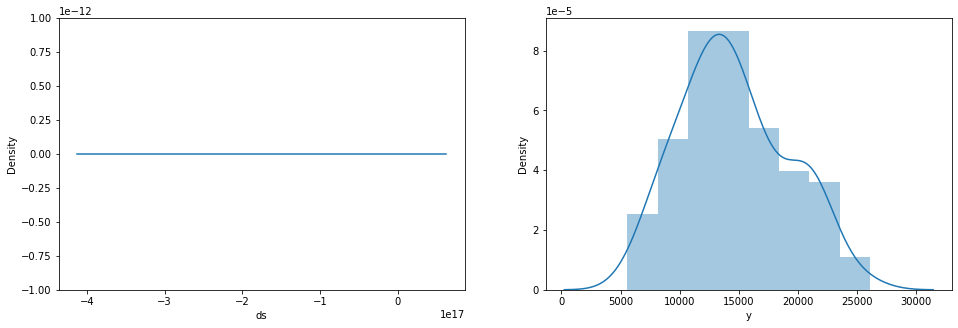

In [ ]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['ds'])
plt.subplot(1,2,2)
sns.distplot(df['y'])
plt.show()


In [ ]:
print("Highest : ",df['y'].mean() + 3*df['y'].std())
print("Lowest : ",df['y'].mean() - 3*df['y'].std())


Highest :  28170.75285047335
Lowest :  1019.4693717488753


In [ ]:
new_df = df[(df['y'] < 28171) & (df['y']>1019)]
new_df

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


In [ ]:
upper_limit = df['y'].mean() + 3*df['y'].std()
lower_limit = df['y'].mean() - 3*df['y'].std()

In [ ]:
df['y'] = np.where(
    df['y']>upper_limit,
    upper_limit,
    np.where(
        df['y']<lower_limit,
        lower_limit,
        df['y']
    )
)

In [ ]:
df['y'].describe()

count      108.000000
mean     14595.111111
std       4525.213913
min       5568.000000
25%      11391.250000
50%      14076.000000
75%      17595.750000
max      26099.000000
Name: y, dtype: float64

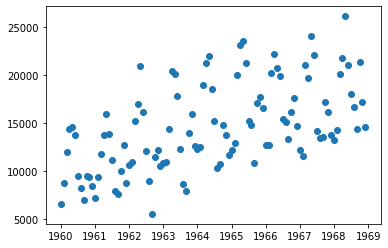

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(new_df['ds'],df['y'])

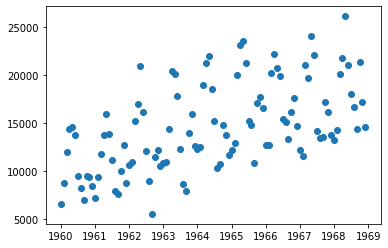

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['ds'],df['y'])

In [ ]:
import fbprophet

In [ ]:
model = fbprophet.Prophet(changepoint_prior_scale = 1,weekly_seasonality=True,daily_seasonality=True)
model.fit(df)

In [ ]:
forecast = model.make_future_dataframe(periods = 17, freq = 'M', include_history = True)
forecast = model.predict(forecast)

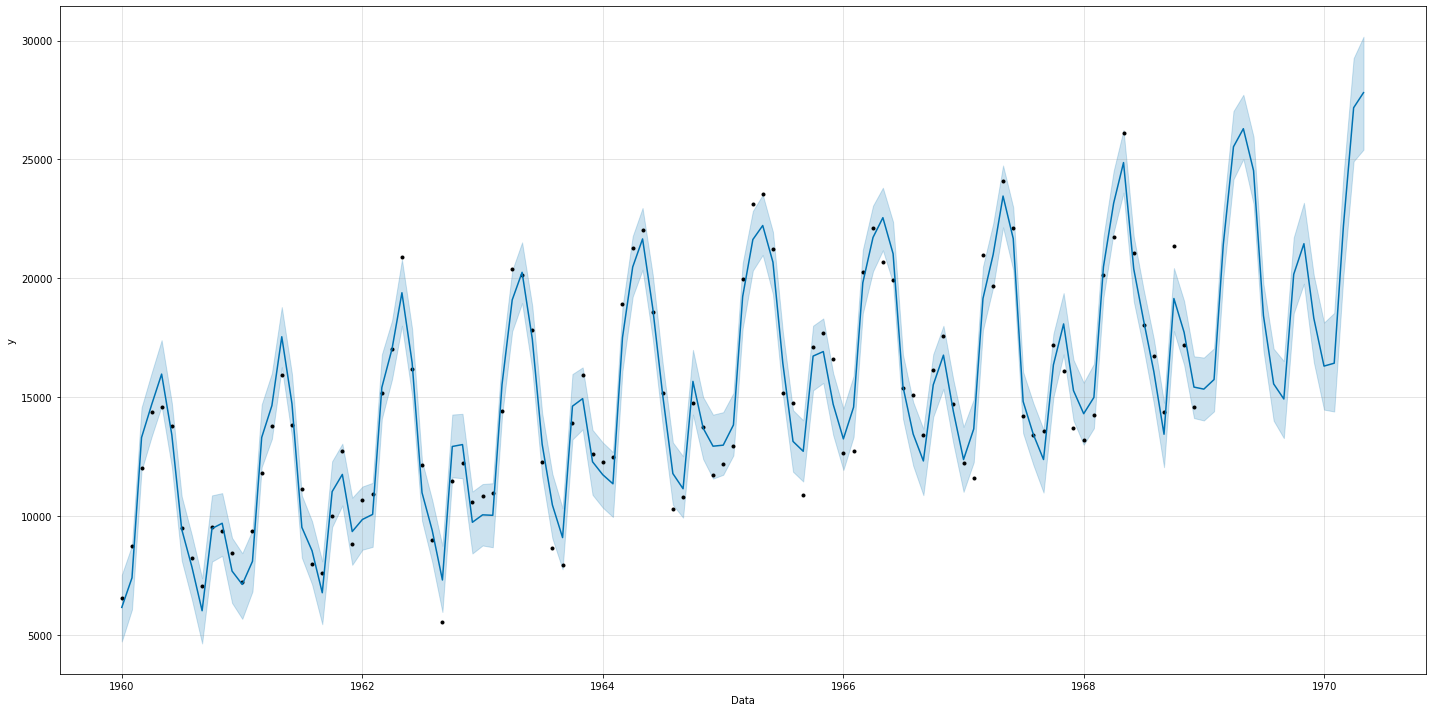

In [ ]:
model.plot(forecast, xlabel = 'Data', ylabel = 'y', figsize = (20,10))
plt.show()

In [ ]:
filename = 'FinalModel.sav'

In [ ]:
import joblib

In [ ]:
joblib.dump(model, filename)

['FinalModel.sav']